Big Data Analytics HW1
======================
##### Submission by: Shane Lindquist

We will be examining the dataset from ml1mdata2000.csv which describes movie ratings and user activities from MovieLens, a movie reccomendation service.
The data contains over 1mil observations with the below attributes:

* User ID
* Gender
* Age
* Occupation
* Zip Code
* Movie ID
* Title
* Genre
* Rating
* Timestamp

##### Using this data, we will answer/complete the following tasks:

1. What unique years are featured in this dataset?
2. how many records are present for each year?
3. Insert a new column called "rating_category" into the dataframe. The column will have the same value "unknown" for each row
4. Display the first five rows of the dataframe
5. Assume that we would like to examine how movie ratings change from first observation (row 1) to tenth observation (row 10). Draw a line plot for the movie ratings using the first ten rows. Do you observe any pattern in the data?
6. Assume that we would like to examine how movie ratings change across different age groups for the first one hundred observation. Considering only the first one hundred rows, draw a scatter plot where the x axis is rating, and y axis is age. Do you observe any pattern in the data?

### Prepping the data

In [1]:
import pandas as pd
mlmdata = pd.read_csv("C:/Users/lindq/OneDrive/Desktop/MSBA degree/Big Data Analysis/ml1mdata2000.csv")
mlmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   user_id     1000196 non-null  float64
 1   movie_id    1000129 non-null  float64
 2   rating      1000209 non-null  int64  
 3   timestamp   1000209 non-null  int64  
 4   gender      1000209 non-null  object 
 5   age         1000143 non-null  float64
 6   occupation  1000154 non-null  float64
 7   zip         1000136 non-null  object 
 8   title       1000036 non-null  object 
 9   genres      1000116 non-null  object 
dtypes: float64(4), int64(2), object(4)
memory usage: 76.3+ MB


##### After loading the dataset into a pandas DataFrame, we can take a quick look at the composition of the data. There are 10 columns and a little over 1 million observations. There appear to be some null values, but for the purposes of this exercise it's not necessary to fill them. We can see the timestamp is not recognized as a datetime, so we will need to make the following adjustment:

In [2]:
# get the data from the timestamp
mlmdata['date']=pd.to_datetime(mlmdata['timestamp'],unit='s',errors='coerce')

#use DatetimeIndex() to extract year and month:
mlmdata['year']=pd.DatetimeIndex(mlmdata['date']).year
mlmdata['month']=pd.DatetimeIndex(mlmdata['date']).month
mlmdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 13 columns):
 #   Column      Non-Null Count    Dtype         
---  ------      --------------    -----         
 0   user_id     1000196 non-null  float64       
 1   movie_id    1000129 non-null  float64       
 2   rating      1000209 non-null  int64         
 3   timestamp   1000209 non-null  int64         
 4   gender      1000209 non-null  object        
 5   age         1000143 non-null  float64       
 6   occupation  1000154 non-null  float64       
 7   zip         1000136 non-null  object        
 8   title       1000036 non-null  object        
 9   genres      1000116 non-null  object        
 10  date        1000209 non-null  datetime64[ns]
 11  year        1000209 non-null  int32         
 12  month       1000209 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(2), object(4)
memory usage: 91.6+ MB


##### column 10 'date' now reads as a datetime object, this will allow us to manipulate it as such.

### 1: What unique years are featured in this dataset?

In [3]:
print(mlmdata['year'].unique())

[2000 2001 2002 2003]


##### The data containes observations from the years 2000, 2001, 2002, and 2003

### 2: How many records are present for each year?

In [4]:
print(mlmdata['year'].value_counts())

year
2000    904757
2001     68058
2002     24046
2003      3348
Name: count, dtype: int64


##### The data contains: 
##### 904,757 observations from the year 2000
##### 68,058 from 2001
##### 24,046 from 2002
##### 3,348 from 2003



### 3: Insert a new column called "rating_category" into the dataframe. The column “rating_category” will have the same value “unknown” for each row.

In [5]:
mlmdata['rating_category']="unknown"

##### Fairly straightforward, we are adding the 'rating_category' with the value 'unknown' in each observation. In the next task we will display the data to see the new added column.

### 4: Display the first five rows of the dataframe.

In [6]:
mlmdata.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres,date,year,month,rating_category
0,1.0,1193.0,5,978300760,F,1.0,10.0,48067,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-31 22:12:40,2000,12,unknown
1,2.0,1193.0,5,978298413,M,56.0,16.0,70072,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-31 21:33:33,2000,12,unknown
2,12.0,1193.0,4,978220179,M,25.0,12.0,32793,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-30 23:49:39,2000,12,unknown
3,15.0,1193.0,4,978199279,M,25.0,7.0,22903,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-30 18:01:19,2000,12,unknown
4,17.0,1193.0,5,978158471,M,50.0,1.0,95350,One Flew Over the Cuckoo's Nest (1975),Drama,2000-12-30 06:41:11,2000,12,unknown


##### The .head() function will return the first 5 observations (unless explicitely prompted for more than 5). We see the index starting at 0 and ends at 4. We can also note the added column 'rating_category' now contains the 'unknown' values in the first five observations.

### 5:Assume that we would like to examine how movie ratings change from first observation (row 1) to tenth observation (row 10). Draw a line plot for the movie ratings using the first ten rows. Do you observe any pattern in the data? 

In [15]:
import matplotlib.pyplot as plt

#creating a subset of the data for plotting
ratings = mlmdata.loc[:10,('date','rating', 'title')]
ratings.head(10)

,date,rating,title
0,2000-12-31 22:12:40,5,One Flew Over the Cuckoo's Nest (1975)
1,2000-12-31 21:33:33,5,One Flew Over the Cuckoo's Nest (1975)
2,2000-12-30 23:49:39,4,One Flew Over the Cuckoo's Nest (1975)
3,2000-12-30 18:01:19,4,One Flew Over the Cuckoo's Nest (1975)
4,2000-12-30 06:41:11,5,One Flew Over the Cuckoo's Nest (1975)
5,2000-12-30 06:02:48,4,One Flew Over the Cuckoo's Nest (1975)
6,2001-02-21 04:48:56,5,One Flew Over the Cuckoo's Nest (1975)
7,2000-12-30 00:38:29,5,One Flew Over the Cuckoo's Nest (1975)
8,2000-12-29 21:26:34,3,One Flew Over the Cuckoo's Nest (1975)
9,2001-01-03 21:36:05,5,One Flew Over the Cuckoo's Nest (1975)


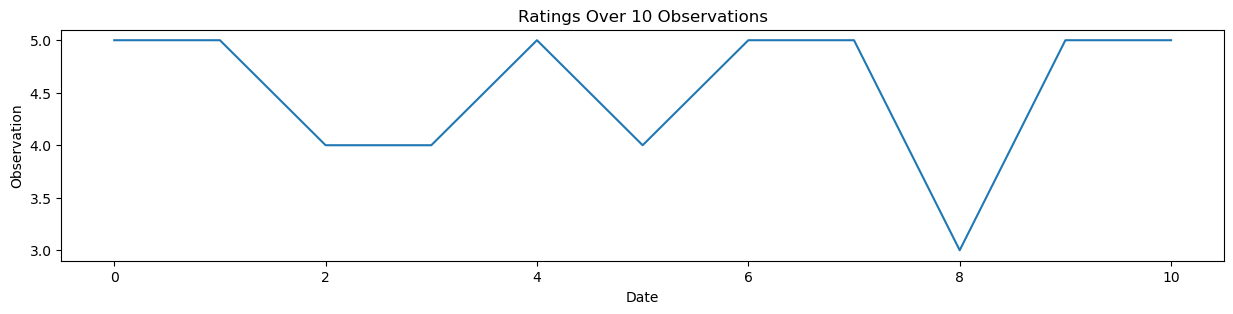

In [14]:
plt.figure(figsize=(15, 3))
plt.plot(ratings['rating'])
plt.title('Ratings Over 10 Observations')
plt.xlabel('Date')
plt.ylabel('Observation')
plt.show()

#### Ratings for the first 10 observations are for the same movie "One Flew over the Cuckoo's Nest". Ratings Vary, but trend high with multiple observations at the maximum of 5 and only one at the low of 3.

### 6: Assume that we would like to examine how movie ratings change across different age groups for the first one hundred observation. Considering only the first one hundred rows, draw a scatter plot where the x axis is rating, and y axis is age. Do you observe any pattern in the data? 

In [16]:
#creating a subset of the data for plotting
age_groups = mlmdata.loc[:100,('rating','age')]

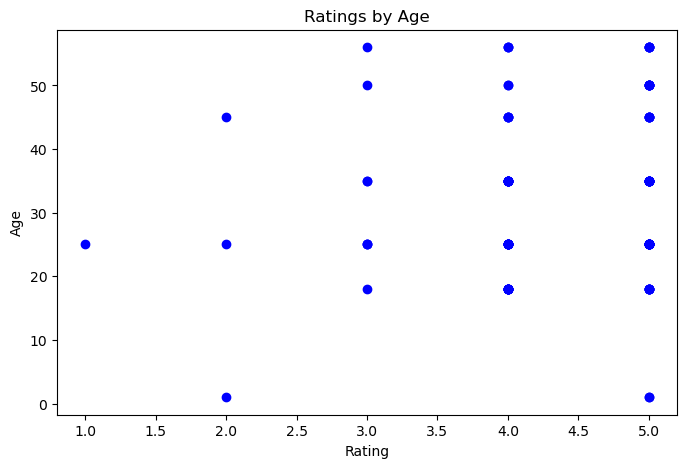

In [19]:
plt.figure(figsize=(8, 5))
plt.scatter(age_groups["rating"], age_groups["age"], c="blue", marker="o")

plt.title("Ratings by Age")
plt.xlabel("Rating")
plt.ylabel("Age")
plt.grid(False)
plt.show()

#### The majority of ratings are gathered from viewers aged 18 - 55. There also appear to be a few outliers, as somehow there are viewers under 5 who gave ratings. Ratings are mostly evenly distributed between 3-5